In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns
sns.set_style('ticks', {'axes.grid': True})
sns.set_context('poster', font_scale=2.0)
%config InlineBackend.figure_format = 'retina'

plt.rcParams['figure.figsize'] = (12.8, 9.6)
plt.rcParams['figure.facecolor'] = 'white'


In [3]:
import pickle

In [4]:
import scipy

import scipy.constants as sc
hbarc = ( sc.hbar * sc.speed_of_light
         / sc.mega / sc.electron_volt / sc.femto )
ainv = 2.194e3 # lattice cutoff in GeV
lat_unit = hbarc/ainv # lattice spacing in fm

mn = 0.602 # mass of N in lattice unit
mpi = 510/ainv # mass of pion in lattice unit

In [5]:
with open('../data/Rcorr_jk_1s0_nn_L64.pkl', 'rb') as fin:
    _, rs, Rcorr_jk = pickle.load(fin)

In [6]:
its = Rcorr_jk['wall'].keys()

In [7]:
bin_num = Rcorr_jk['wall'][10].shape[0]

In [8]:
L = 64
rs_full = np.array([np.sqrt(ix**2 + iy**2 + iz**2)
                    for ix in range(-L//2,L//2)
                    for iy in range(-L//2,L//2)
                    for iz in range(-L//2,L//2)]).reshape(L,L,L)
rs_full = np.roll(rs_full, (L//2,L//2,L//2), axis=(0,1,2)).flatten()


In [9]:
a1_uniq = np.array([ix + L * (iy + L * iz)
                   for ix in range(0, L//2+1)
                   for iy in range(0, ix+1)
                   for iz in range(0, iy+1)])

In [10]:
a1_uniq_ind = {}
ind = 0
for ix in range(0, L//2+1):
    for iy in range(0, ix+1):
        for iz in range(0, iy+1):
            a1_uniq_ind[(ix, iy, iz)] = ind
            ind += 1
xyz_ind = {}
for ix in range(L):
    for iy in range(L):
        for iz in range(L):
            _ind = np.sort([min(ix,L-ix), min(iy,L-iy), min(iz,L-iz)])[::-1]
            xyz_ind[(ix,iy,iz)] = a1_uniq_ind[(_ind[0], _ind[1], _ind[2])]

In [11]:
Rcorr_jk_full = {}
for src in ['wall', 'exp']:
    Rcorr_jk_full[src] = {}
    for it in its:
        wave_full = np.zeros((bin_num, L, L, L))
        for ix in range(L):
            for iy in range(L):
                for iz in range(L):
                    wave_full[:,ix,iy,iz] = Rcorr_jk[src][it][:,xyz_ind[(ix,iy,iz)]]
        Rcorr_jk_full[src][it] = wave_full.reshape(bin_num, L**3)

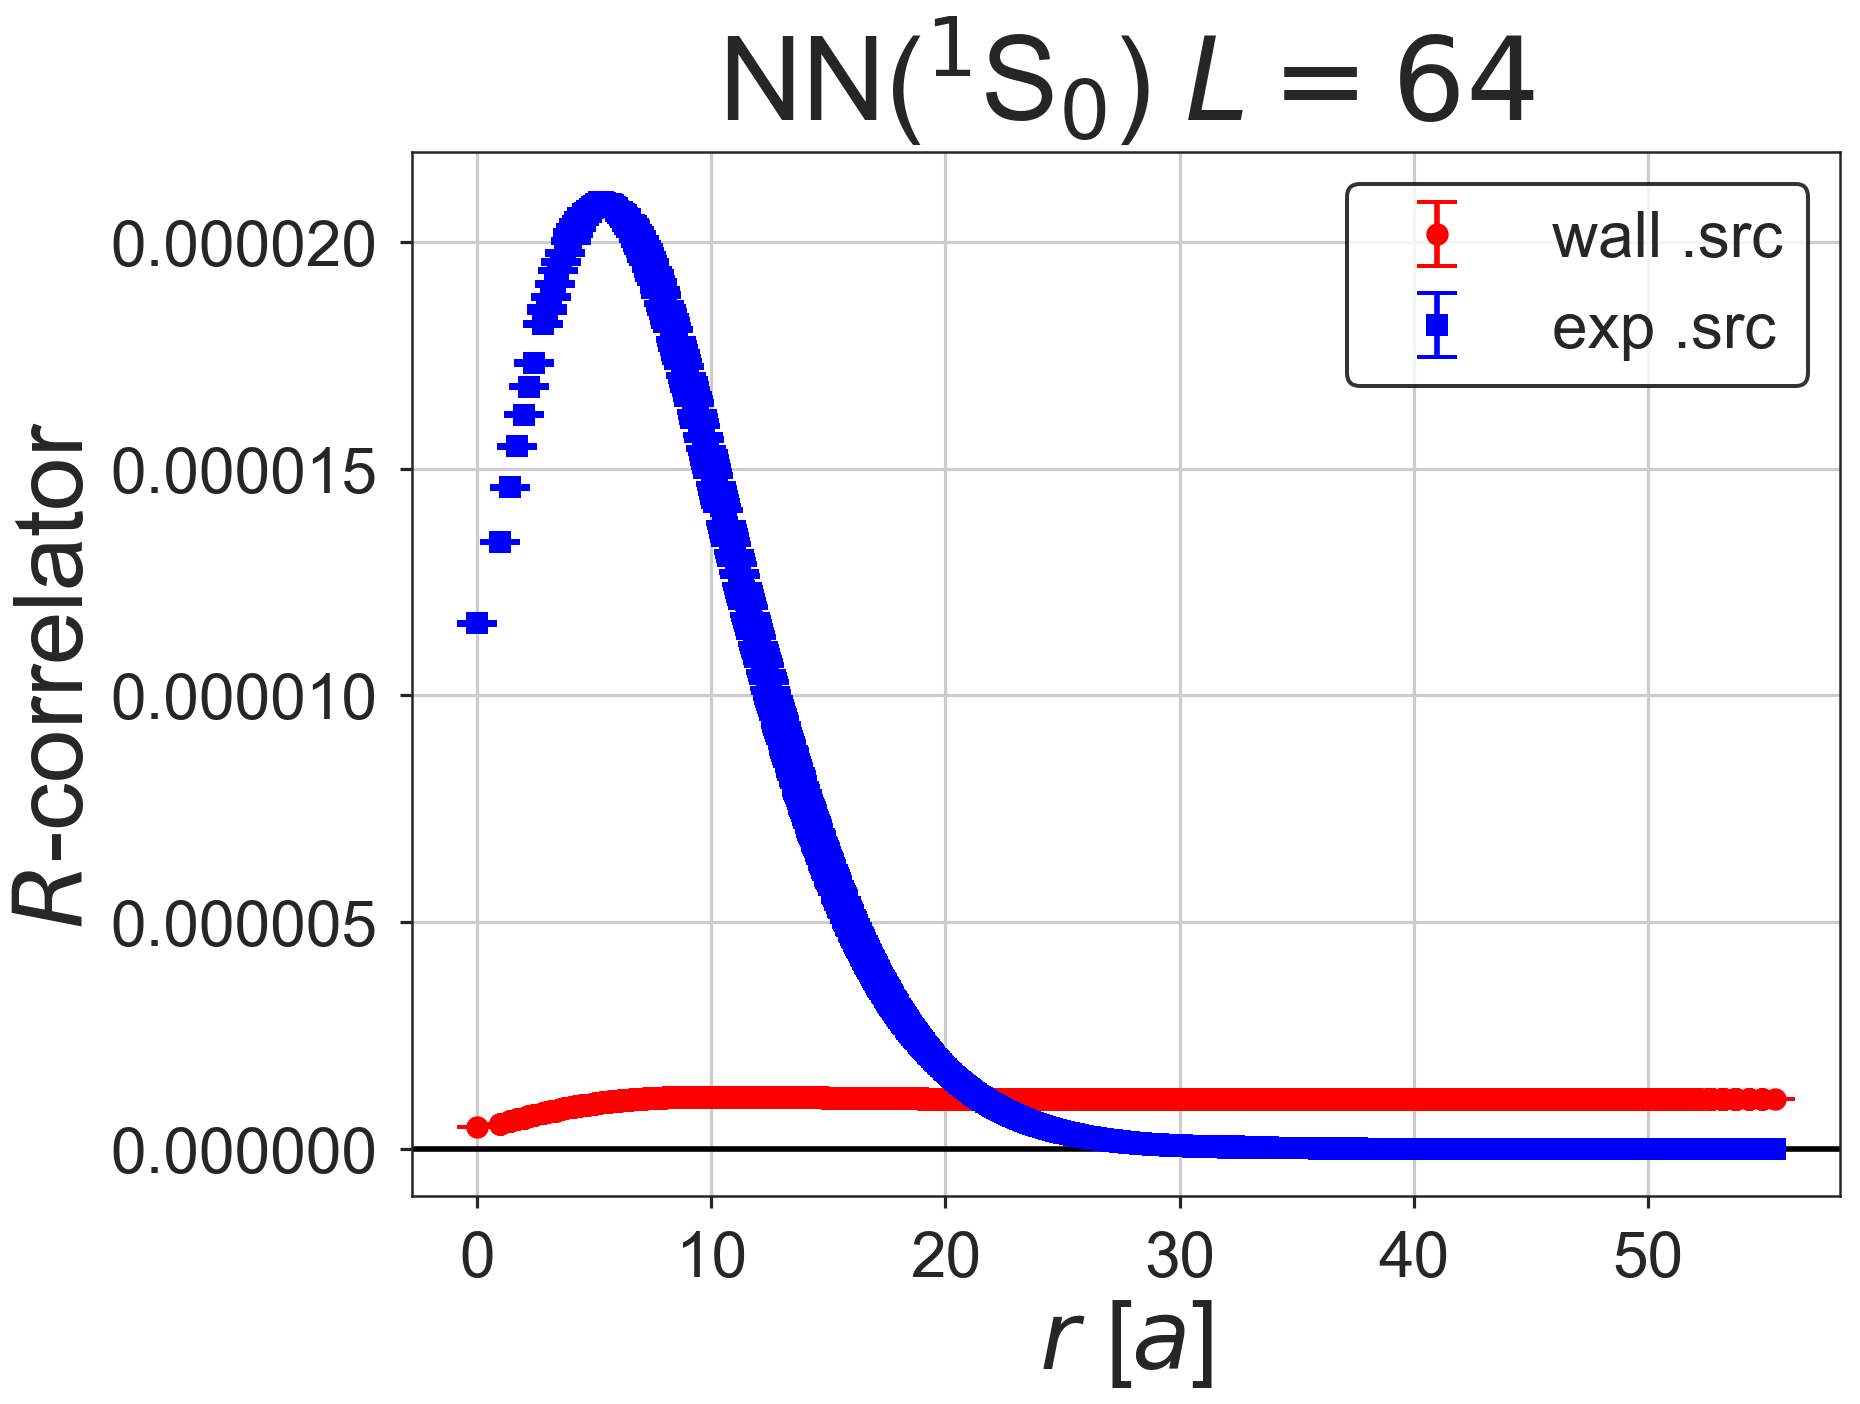

In [12]:
fig, ax = plt.subplots()

it0 = 12
for src, fmt, col in zip(['wall', 'exp'], ['o', 's'], ['red', 'blue']):
    ax.errorbar(rs_full, Rcorr_jk_full[src][it0].mean(axis=0),
           Rcorr_jk_full[src][it0].std(axis=0) * np.sqrt(bin_num), fmt=fmt,
                label=src + ' .src', color=col, capthick=2.0, capsize=10)
    
ax.set_xlabel(r'$r$ [$a$]', size=48)
ax.set_ylabel(r'$R$-correlator', size=48)
leg = ax.legend(frameon=True)
leg.get_frame().set_edgecolor('black')
leg.get_frame().set_linewidth(2.0)
ax.axhline(0, color='black')
ax.set_title(r'NN($^1$S$_0$) $L = 64$', size=58, y=1.02);